In [2]:
# Python Notebook for PHYS 429 Experiment #4

from scipy import integrate
from matplotlib import rc
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import scipy as sp
from scipy.optimize import curve_fit
import random
from scipy.signal import argrelextrema

# extra stuff to make the plots look nice:

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

params = {"text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["cmr10"],
          "font.size": 20
         }
plt.rcParams.update(params)
plt.rcParams['axes.formatter.use_mathtext'] = True

import os
os.environ["PATH"]
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Set tick parameters using rcParams
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = 0.7
plt.rcParams['xtick.minor.width'] = 0.7
plt.rcParams['ytick.major.width'] = 0.7
plt.rcParams['ytick.minor.width'] = 0.7

plt.rcParams['font.weight'] = 'bold'

from matplotlib.colors import PowerNorm

#from pyxrf.api import *


In [3]:
# reads in data:

filepath_w = '/Users/benrasmussen/Desktop/Phys 429A/Experiment 4/wedge data.csv'
filepath_c = '/Users/benrasmussen/Desktop/Phys 429A/Experiment 4/cone data.csv'

data_w = np.loadtxt(filepath_w, delimiter=',', skiprows=1).T
data_c = np.loadtxt(filepath_c, delimiter=',', skiprows=1).T

pres_w = np.array([10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,84])
pres_c = np.array([25,30,35,40,45,50,55,60,65,70,75,80,84])

In [4]:
# shape of the data:

print(len(pres_w))
print(len(pres_c))

print(data_w.shape)
print(data_c.shape)

16
13
(32, 28)
(26, 24)


NameError: name 'xw_offsets' is not defined

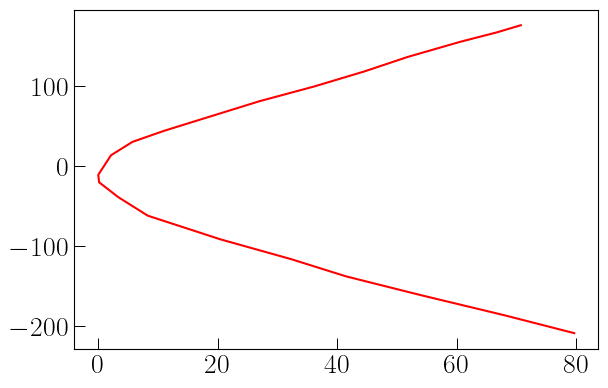

In [21]:
# first attempt at plotting whats going on:

yw_offsets=np.array([-24,-30,-30,-22,-30,-19,-18,-15,-11,-18,-14,-14,-14,-11,-8,-18]); new_data_w = np.zeros_like(data_w)

width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# plotting this:

for i in range(0,int(len(data_w)/2)):
    j = 2*i
    ax1.plot(data_w[j]-min(data_w[j]), -1*data_w[j+1]+min(data_w[j+1])+200+yw_offsets[i], c=[1-0.03*j/1.,0.01*j/3,0.05*j/3])
    new_data_w[j] = np.array(data_w[j])-xw_offsets[i]
    new_data_w[j+1] = np.array(data_w[j+1]) - yw_offsets[i]
    if i==0:
        ax1.plot(data_w[j]-min(data_w[j]), -1*data_w[j+1]+min(data_w[j+1])+200+yw_offsets[i], c=[1-0.03*j/1.,0.01*j/3,0.05*j/3], label='84 psi')
    if i==15:
        ax1.plot(data_w[j]-min(data_w[j]), -1*data_w[j+1]+min(data_w[j+1])+200+yw_offsets[i], c=[1-0.03*j/1.,0.01*j/3,0.05*j/3], label='10 psi')


# labels
ax1.set_title(r"Mach Angle for Increasing Line Pressures", pad = 15, fontsize=24)
ax1.set_ylabel(r"Y Position, [Pix]",labelpad =10, fontsize=24)
ax1.set_xlabel(r"X Position, [Pix]",labelpad =10,fontsize=24)

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(0.2));ax1.yaxis.set_minor_locator(MultipleLocator(0.04))
#ax1.xaxis.set_major_locator(MultipleLocator(100));ax1.xaxis.set_minor_locator(MultipleLocator(10))
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 25}, loc='upper right')
ax1.set_ylim(-15,120)
ax1.set_xlim(-20,62)
ax1.grid(True)
xs = np.linspace(3, 80)

y = line(xs, 0.15, 0, )
y2 = line(xs, -0.15, 0)

ax1.plot(xs, y, c='k')
ax1.plot(xs, y2, c='k')
ax1.yaxis.set_major_locator(MultipleLocator(25));ax1.yaxis.set_minor_locator(MultipleLocator(5))
ax1.xaxis.set_major_locator(MultipleLocator(20));ax1.xaxis.set_minor_locator(MultipleLocator(2))
ax1.fill_between(xs-1,y,y2, color='k', zorder=100,label='Wedge Angle')
ax1.legend(loc='upper left', fontsize=14)

plt.savefig('/Users/benrasmussen/Desktop/Phys 429A/Experiment 4/wedge_angle.png', format='png', dpi=300)

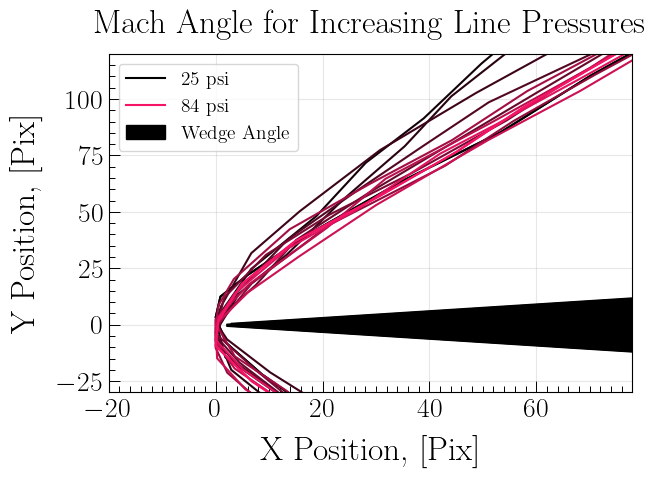

In [22]:
# first attempt at plotting whats going on:

yc_offsets=np.array([10,-2,-12,12,5,12,10,-5,5,5,5,5,5]); new_data_c = np.zeros_like(data_c)

width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# plotting this:

for i in range(0,int(len(data_c)/2)):
    j = 2*i
    ax1.plot(data_c[j]-min(data_c[j]), -1*data_c[j+1]+min(data_c[j+1])+200+yc_offsets[i], c=[0.04*j/1.,0.01*j/3,0.05*j/3])
    new_data_c[j] = np.array(data_c[j])
    new_data_c[j+1] = np.array(data_c[j+1]) - yc_offsets[i]
    if i==12:
        ax1.plot(data_c[j]-min(data_c[j]), -1*data_c[j+1]+min(data_c[j+1])+200+yc_offsets[i], c=[0.04*j/1.,0.01*j/3,0.05*j/3], label='84 psi')
    if i==0:
        ax1.plot(data_c[j]-min(data_c[j]), -1*data_c[j+1]+min(data_c[j+1])+200+yc_offsets[i], c=[0.04*j/1.,0.01*j/3,0.05*j/3], label='25 psi')


# labels
ax1.set_title(r"Mach Angle for Increasing Line Pressures", pad = 15, fontsize=24)
ax1.set_ylabel(r"Y Position, [Pix]",labelpad =10, fontsize=24)
ax1.set_xlabel(r"X Position, [Pix]",labelpad =10,fontsize=24)

# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(25));ax1.yaxis.set_minor_locator(MultipleLocator(5))
ax1.xaxis.set_major_locator(MultipleLocator(20));ax1.xaxis.set_minor_locator(MultipleLocator(2))
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 25}, loc='upper right')
ax1.set_ylim(-30,120)
ax1.set_xlim(-20,78)
ax1.grid(True, zorder=0)
xs = np.linspace(3, 80)

y = line(xs, 0.15, 0, )
y2 = line(xs, -0.15, 0)

ax1.plot(xs, y, c='k')
ax1.plot(xs, y2, c='k')

ax1.fill_between(xs-1,y,y2, color='k', zorder=10,label='Wedge Angle')
ax1.legend(loc='upper left', fontsize=14)

plt.savefig('/Users/benrasmussen/Desktop/Phys 429A/Experiment 4/cone_angle.png', format='png', dpi=300)

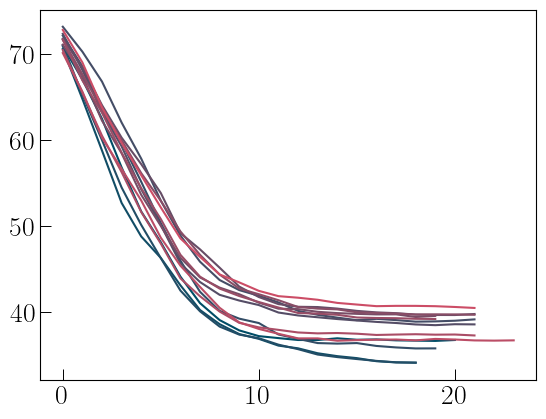

In [23]:
ifig=3; plt.close(ifig);plt.figure(ifig);

eek = np.zeros(13)
for i in range(13):
    j = i*2
    plt.plot(np.arctan((((data_c[j])/(-1*data_c[j+1]))))*180/np.pi, c=[0.1*j/3, 0.3, 0.4])
    #print(max(np.arctan((((data[j])/(data[j+1]))))*180/np.pi))
    eek[i] = max(np.arctan((((data_c[j])/(-1*data_c[j+1]))))*180/np.pi)

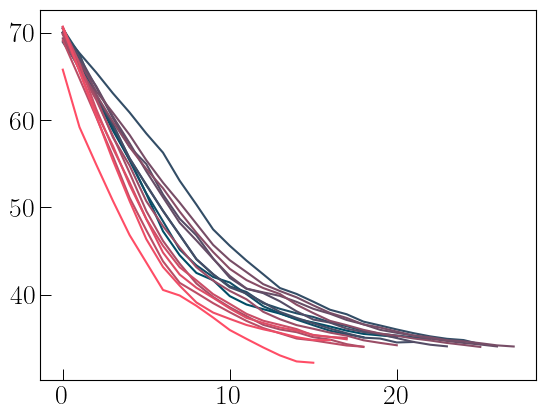

In [24]:
ifig=3; plt.close(ifig);plt.figure(ifig);

eek2 = np.zeros(16)
for i in range(16):
    j = i*2
    plt.plot(np.arctan((((data_w[j])/(-1*data_w[j+1]))))*180/np.pi, c=[0.1*j/3, 0.3, 0.4])
    #print(max(np.arctan((((data[j])/(data[j+1]))))*180/np.pi))
    eek2[i] = max(np.arctan((((data_w[j])/(-1*data_w[j+1]))))*180/np.pi)

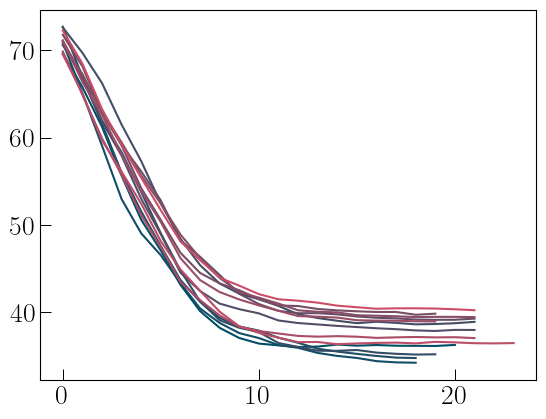

In [25]:
ifig=3; plt.close(ifig);plt.figure(ifig);

eek3 = np.zeros(13)
for i in range(13):
    j = i*2
    plt.plot(np.arctan((((new_data_c[j])/(-1*new_data_c[j+1]))))*180/np.pi, c=[0.1*j/3, 0.3, 0.4])
    #print(max(np.arctan((((data[j])/(data[j+1]))))*180/np.pi))
    eek3[i] = max(np.arctan((((new_data_c[j])/(-1*new_data_c[j+1]))))*180/np.pi)

/Users/benrasmussen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/benrasmussen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


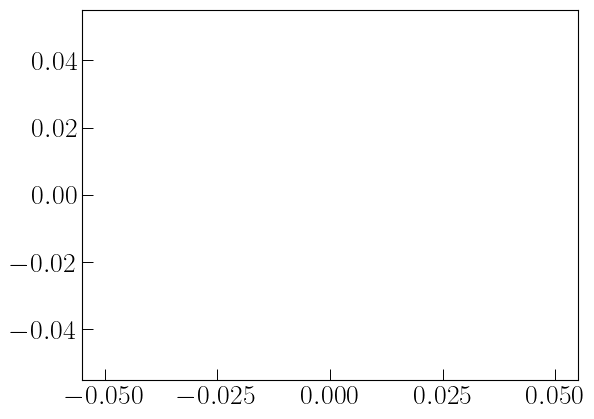

In [26]:
ifig=3; plt.close(ifig);plt.figure(ifig);

eek4 = np.zeros(16)
for i in range(16):
    j = i*2
    plt.plot(np.arctan((((new_data_w[j])/(-1*new_data_w[j+1]))))*180/np.pi, c=[0.1*j/3, 0.3, 0.4])
    #print(max(np.arctan((((data[j])/(data[j+1]))))*180/np.pi))
    eek4[i] = max(np.arctan((((new_data_w[j])/(-1*new_data_w[j+1]))))*180/np.pi)

In [27]:
# data:
wedge_mach = 1/np.sin(eek4*np.pi/180)
cone_mach = 1/np.sin(eek3*np.pi/180)

pres_cc =pres_c[::-1]


In [28]:
# now wish to fit the data:

def linear(x, m,b):
    return m*x+b


p0 = (1,1) # start with values near those we expect
params_w, cv_w = sp.optimize.curve_fit(linear, pres_w, wedge_mach, p0=p0)#, sigma=np.array(dy_fl2), absolute_sigma=True)
m_w,b_w = params_w
err_con_w = np.sqrt(np.diag(cv_w))

print(params_w, err_con_w)

p0 = (1,1) # start with values near those we expect
params_c, cv_c = sp.optimize.curve_fit(linear, pres_cc, cone_mach, p0=p0)#, sigma=np.array(dy_fl2), absolute_sigma=True)
m_c,b_c = params_c
err_con_c = np.sqrt(np.diag(cv_c))

print(params_c, err_con_c)
# opt_mod = monoExp(concrete, a,b,c)/n_0
# r = fl_count/n_0 - opt_mod
# chisq = np.sum((r/dy_fl2)**2)
# ndf = len(concrete) - len(params) 
# print(chisq,ndf)

def chi_squared_reduced(data, model, sigma, dof=None):

    sq_residual = (data - model)**2
    chi_sq = np.sum(sq_residual / sigma**2)
    if dof is None:
        return chi_sq
    else:
        nu = len(data) - dof
        print(nu)
        return chi_sq / nu

ValueError: array must not contain infs or NaNs

In [29]:
chi_squared_reduced(

SyntaxError: unexpected EOF while parsing (2278076670.py, line 1)

NameError: name 'params_c' is not defined

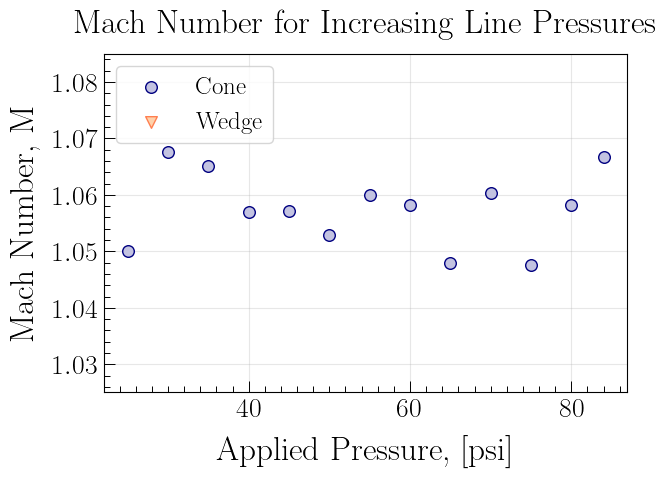

In [30]:
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

# plotting this:
plt.scatter(pres_cc, cone_mach, marker='o', edgecolor='navy',c='#c3c3e1', s=70, zorder=5, label='Cone')
plt.scatter(pres_w, wedge_mach, marker='v', edgecolor='coral', c='#ffd2ab',s=70, zorder=5, label='Wedge')

# labels
ax1.set_title(r"Mach Number for Increasing Line Pressures", pad = 15, fontsize=24)
ax1.set_ylabel(r"Mach Number, M",labelpad =10, fontsize=24)
ax1.set_xlabel(r"Applied Pressure, [psi]",labelpad =10,fontsize=24)

# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(0.01));ax1.yaxis.set_minor_locator(MultipleLocator(0.002))
ax1.xaxis.set_major_locator(MultipleLocator(20));ax1.xaxis.set_minor_locator(MultipleLocator(2))
ax1.grid(True, alpha=0.3, zorder=10)
ax1.legend( prop={'size': 18}, loc='upper left')
ax1.set_ylim(1.025, 1.085)
#ax1.set_xlim(-20,78)
ax1.grid(True, zorder=0)

pres_x = np.linspace(5, 100,100)
plt.plot(pres_x, linear(pres_x, *params_c), c='midnightblue', alpha=0.6)

plt.plot(pres_x, linear(pres_x, *params_w), c='tomato', alpha=0.6)



plt.savefig('/Users/benrasmussen/Desktop/Phys 429A/Experiment 4/mach_number.png', format='png', dpi=300)

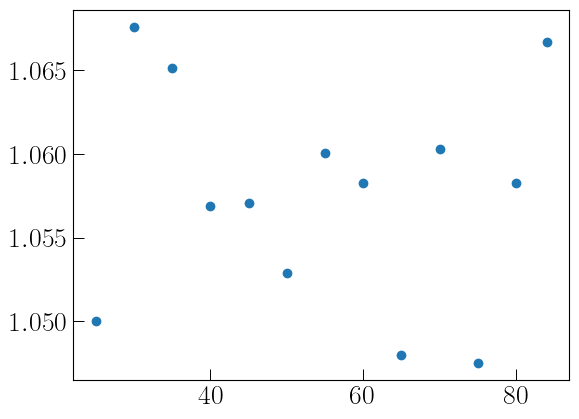

In [31]:
plt.scatter(pres_c[::-1],1/np.sin(eek3*np.pi/180))
#plt.scatter(pres_c[::-1],1/np.sin(eek*np.pi/180))
#plt.scatter(pres_w,1/np.sin(eek2*np.pi/180))
plt.scatter(pres_w,1/np.sin(eek4*np.pi/180))

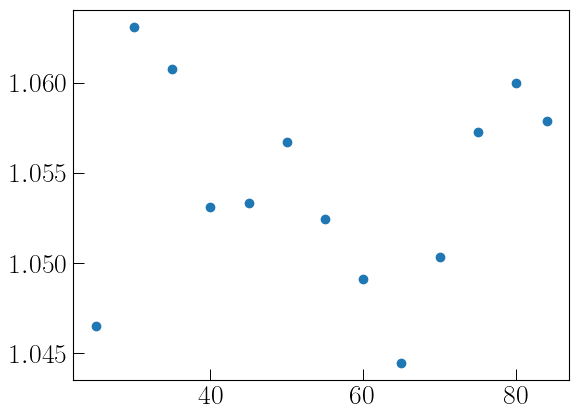

In [32]:
#plt.scatter(pres_c[::-1],1/np.sin(eek3*np.pi/180))
plt.scatter(pres_c[::-1],1/np.sin(eek*np.pi/180))

In [33]:
def line(x, m, b):
    return m*x+b



In [34]:
ifig =1; plt.close(ifig); plt.figure(ifig)

for i in range(16):
    j = 2*i
    plt.plot(data[j]-min(data[j]), data[j+1]-max(data[j+1])+200, c=[0.1*j/5,0.1*j/5,0.1*j/4])

xs = np.linspace(3, 80)

y = line(xs, 0.15, 0, )
y2 = line(xs, -0.15, 0)

plt.plot(xs, y, c='k')
plt.plot(xs, y2, c='k')

plt.fill_between(xs,y,y2, color='k', zorder=100)

#ylim(-320,0)
plt.grid(True, alpha=0.3)

NameError: name 'data' is not defined

<Figure size 640x480 with 0 Axes>

In [35]:
ifig=3; plt.close(ifig);plt.figure(ifig);

eek = np.zeros(16)
for i in range(16):
    j = i*2
    plt.plot(np.arctan((((data[j])/(data[j+1]))))*180/np.pi, c=[0.1*j/6, 0.3, 0.4])
    #print(max(np.arctan((((data[j])/(data[j+1]))))*180/np.pi))
    eek[i] = max(np.arctan((((data[j])/(data[j+1]))))*180/np.pi)

NameError: name 'data' is not defined

<Figure size 640x480 with 0 Axes>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

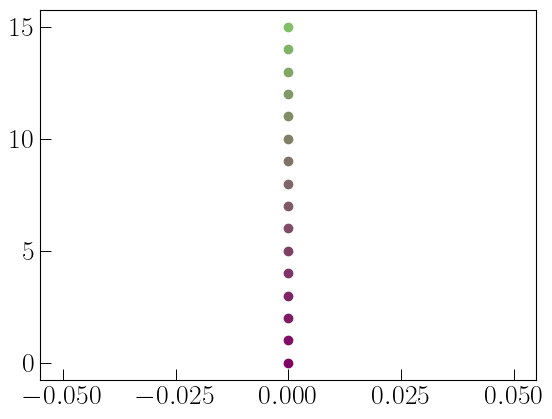

In [36]:
ifig=123; plt.close(ifig); plt.figure(ifig)
for i in range(len(eek)):
    plt.scatter(eek[i],i, c=[0.5, 0.1*i/2,0.4])
#scatter(np.linspace(1,16,16),eek)

In [37]:
data[0]

NameError: name 'data' is not defined

In [38]:
test

NameError: name 'test' is not defined

In [39]:
ifig=2; close(ifig);figure(ifig);
plot(test)

NameError: name 'close' is not defined

In [40]:
print(y2[-1])

-12.0


In [41]:
np.arcsin(12/80) *180/(np.pi)

8.626926558678639

In [42]:
import csv

# Open the CSV file
with open(filepath, 'r') as csvfile:
    # Initialize a CSV reader
    csvreader = csv.reader(csvfile)
    
    # Initialize an empty list to store the data
    data = []
    
    # Iterate over each row in the CSV file
    for row in csvreader:
        # Append the row to the data list
        cleaned_row = [float(val) if not val.startswith('\ufeff') else float(val[1:]) for val in row]

        row_fl = [float(i) for i in cleaned_row]
        data.append(row)
    data=np.array(data)
    data=data.T

# Print the loaded data
print(float(data))

NameError: name 'filepath' is not defined

In [43]:
cone_mach
wedge_mach

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan])